#### import the things

In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice

import scipy.stats
import data
raw_data_fol = os.path.join(data.__path__[0], "raw")

In [2]:
from src.data import data_sorting_tools as dst
%load_ext autoreload
%autoreload 2

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_pickle(os.path.join(data.__path__[0], "compiled", "full_dataset_cleaned.pkl"))

In [4]:
df.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,full_text,media_count,media_types
tid,uid,,,,,,,,,
1333476068192366593,2152363202,0,2,3,16,6070,False,"Teen pregnancy is high, HIV infection rate is ...",0,none
1364161232270487553,1331332400836726785,0,0,0,0,62,False,Even though it was a charity. Stevens thought...,0,none
1364161201291153414,150301804,0,0,0,0,1044,False,SCORA\nStanding Committee on Sexual &amp; Repr...,0,none
1364161184505737217,1317091162159747075,0,0,0,0,15,False,"many females are HIV+, we wish you well, bless...",0,none
1363439109948149760,1353391442408792066,0,0,2,24,184,False,@TheRustler83 Yep. Imagine if the government w...,0,none


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7662 entries, (1333476068192366593, 2152363202) to (1363949692288004103, 308788980)
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quote_count           7662 non-null   Int64  
 1   reply_count           7662 non-null   Int64  
 2   retweet_count         7662 non-null   Int64  
 3   favorite_count        7662 non-null   Int64  
 4   user_followers_count  7662 non-null   Int64  
 5   user_verified         7662 non-null   boolean
 6   full_text             7662 non-null   object 
 7   media_count           7662 non-null   Int64  
 8   media_types           7662 non-null   string 
dtypes: Int64(6), boolean(1), object(1), string(1)
memory usage: 1.1+ MB


#### compare the distributions of different parameters based on if the user making the tweet is verified or not

In [6]:
verified = df[df.user_verified==True]
not_verified = df[df.user_verified==False]

In [7]:
verified.shape, not_verified.shape

((450, 9), (7212, 9))

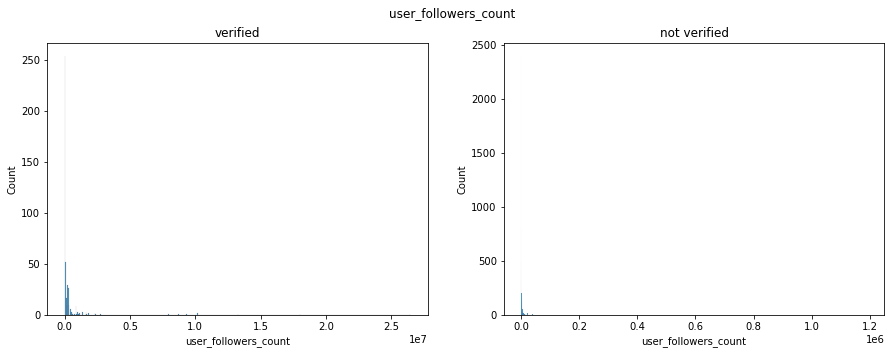

In [8]:
parameter = 'user_followers_count'

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(verified[verified[parameter]>0][parameter], ax=axs[0])
sns.histplot(not_verified[not_verified[parameter]>0][parameter], ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

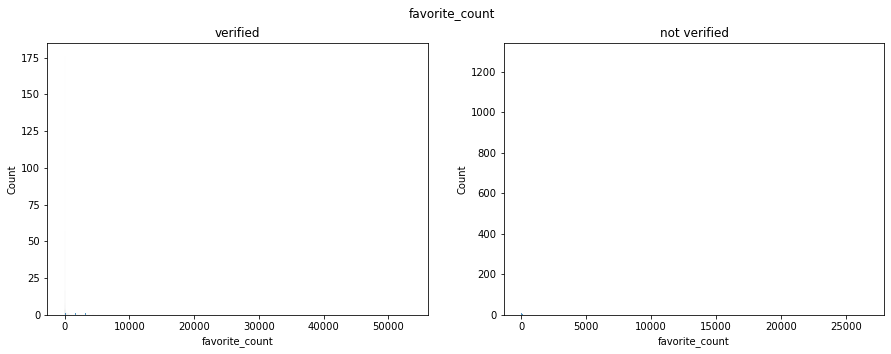

In [9]:
parameter = 'favorite_count'

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(verified[verified[parameter]>0][parameter], ax=axs[0])
sns.histplot(not_verified[not_verified[parameter]>0][parameter], ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

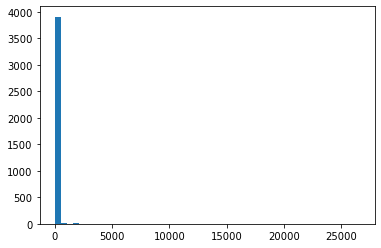

In [14]:
plt.hist(not_verified[not_verified[parameter]>0][parameter], bins=50)
plt.show()

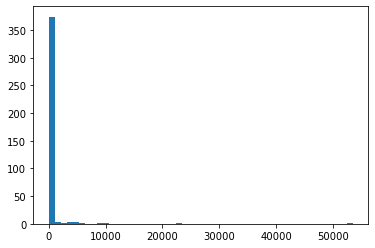

In [13]:
plt.hist(verified[verified[parameter]>0][parameter], bins=50)
plt.show()

In [ ]:
parameter = 'retweet_count'

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(verified[verified[parameter]>0][parameter], ax=axs[0])
sns.histplot(not_verified[not_verified[parameter]>0][parameter], ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

In [ ]:
parameter = 'reply_count'

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(verified[verified[parameter]>0][parameter], ax=axs[0])
sns.histplot(not_verified[not_verified[parameter]>0][parameter], ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

In [ ]:
parameter = 'quote_count'

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(verified[verified[parameter]>0][parameter], ax=axs[0])
sns.histplot(not_verified[not_verified[parameter]>0][parameter], ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

#### Doing permutation tests on the favorite count parameter to see if there's a statsical difference between verified and non verified users

In [16]:
#using code from the Springboard apps project
df['permutation'] = np.random.permutation(df['favorite_count'].values).astype(int)

df.groupby('user_verified').describe()[['favorite_count', 'permutation']]

favorite_count                                                \
                       count        mean          std  min  25%  50%   75%   
user_verified                                                                
False                 7212.0   25.323489   468.813686  0.0  0.0  1.0   3.0   
True                   450.0  353.524444  2876.069471  0.0  2.0  9.0  28.0   

                       permutation                                             \
                   max       count       mean         std  min  25%  50%  75%   
user_verified                                                                   
False          26604.0      7212.0  45.432058  856.678459  0.0  0.0  1.0  4.0   
True           53417.0       450.0  31.251111  341.318766  0.0  0.0  1.0  3.0   

                        
                   max  
user_verified           
False          53417.0  
True            5377.0

In [18]:
df.groupby('user_verified').mean()[['favorite_count', 'permutation']]

,favorite_count,permutation
user_verified,,
False,25.323489,45.432058
True,353.524444,31.251111


In [19]:
difference = []
perm_df = df[['user_verified', 'favorite_count', 'permutation']]   
for n in range(10000):
    perm_df.loc[:, 'permutation']  = np.random.permutation(perm_df['favorite_count'].values).astype(int)
    gb_df = perm_df.groupby('user_verified').mean()
    diff = gb_df.at[False, 'permutation'] - gb_df.at[True, 'permutation']
    difference.append(diff)

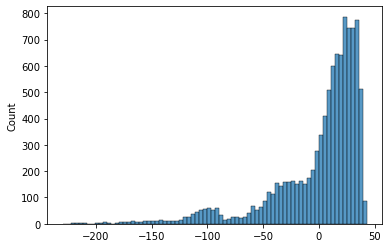

In [20]:
sns.histplot(difference)
plt.show()

In [27]:
df.groupby('user_verified').mean().at[False, 'favorite_count'], df.groupby('user_verified').mean().at[True, 'favorite_count']

(25.32348863006101, 353.52444444444444)

In [22]:
obs_difference =  df.groupby('user_verified').mean().at[False, 'favorite_count'] - df.groupby('user_verified').mean().at[True, 'favorite_count']
obs_difference = abs(obs_difference)
print(obs_difference)

328.2009558143834


In [28]:
df.groupby('user_verified').median().at[False, 'favorite_count'], df.groupby('user_verified').median().at[True, 'favorite_count']

(1, 9)

That is a VERY BIG difference between the observed means and the permutation means, and between their medians, too. Is there potentially an outlier throwing off the verified values? 

In [23]:
verified['favorite_count'].sort_values(ascending=False)[:15]

tid                  uid       
1050527244811030528  379408088     53417
803879266416934913   637313893     23178
1358792705728413696  19177501       9908
1358119265774280709  19177501       9611
1358460515266273281  19177501       5377
1359431966123319299  19177501       5209
1358853102577668096  19177501       4718
1357804657154916354  78621972       4459
1358812884277612550  65045121       4386
1360514045502099457  19177501       3763
1318482112564088832  2904913023     3698
1010205546236874752  50037051       3329
1053492330215292929  50037051       3226
1357043244799045633  320316357      2166
1356657885577687040  78621972       2104
Name: favorite_count, dtype: Int64

The top value is double the next highest value, and the 2nd highest is 2.5x the 3rd highest. 

In [24]:
not_verified['favorite_count'].sort_values(ascending=False)[:15]

tid                  uid                
1307763203733164033  3029911732             26604
1115786788017180674  961498199159721985     21792
1216699685022392321  491404434               9359
1079473214315741186  485964552               8350
1353812935458639872  2424318834              7051
1195090950776926222  114985093               7039
1080123466832072705  931896955625545730      6183
1148701561549447169  1147986841573953537     4754
1339973302480228362  23713246                4736
1362583047317557248  760397096               3457
1343618572761919489  1382158386              3123
1364850787617107971  41088384                2040
1310659145062928384  1159751594122076161     1926
1360617380666351621  429614846               1904
1359580924741058565  36778456                1887
Name: favorite_count, dtype: Int64

Of course, the non-verified accounts also have two very high values.

In [29]:
df['favorite_count'].sort_values(ascending=False).head()

tid                  uid               
1050527244811030528  379408088             53417
1307763203733164033  3029911732            26604
803879266416934913   637313893             23178
1115786788017180674  961498199159721985    21792
1358792705728413696  19177501               9908
Name: favorite_count, dtype: Int64

but overall, that top number is far beyond all the rest. So what if I drop it?

In [30]:
df2 = df.drop(1050527244811030528, axis=0, level='tid')
df2['favorite_count'].sort_values(ascending=False)[:5]

tid                  uid               
1307763203733164033  3029911732            26604
803879266416934913   637313893             23178
1115786788017180674  961498199159721985    21792
1358792705728413696  19177501               9908
1358119265774280709  19177501               9611
Name: favorite_count, dtype: Int64

In [31]:
df2['permutation'] = np.random.permutation(df2['favorite_count'].values).astype(int)
df2.groupby('user_verified').mean()[['favorite_count', 'permutation']]

,favorite_count,permutation
user_verified,,
False,25.323489,38.067942
True,235.342984,30.636971


There is still a very big difference. I expect the difference will remain significant but I will repeat the whole process anyway.

In [32]:
difference = []
perm_df = df2[['user_verified', 'favorite_count', 'permutation']]   
for n in range(10000):
    perm_df.loc[:, 'permutation']  = np.random.permutation(perm_df['favorite_count'].values).astype(int)
    gb_df = perm_df.groupby('user_verified').mean()
    diff = gb_df.at[False, 'permutation'] - gb_df.at[True, 'permutation']
    difference.append(diff)

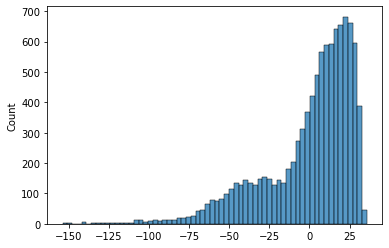

In [33]:
sns.histplot(difference)
plt.show()

In [34]:
obs_difference =  df2.groupby('user_verified').mean().at[False, 'favorite_count'] - df2.groupby('user_verified').mean().at[True, 'favorite_count']
obs_difference = abs(obs_difference)
print(obs_difference)

210.01949577973855


While the difference in means is slightly less than previously calculated, it's still so far outside the distribution of means that the difference in favorite counts between verified and not verified users in not due to chance alone.

What about the other end of the distribution? Do non verified user tweets have a higher probability of being 0?

In [35]:
v_0_fav =  len(verified[verified.favorite_count==0]) / len(verified)
nv_0_fav = len(not_verified[not_verified.favorite_count==0]) / len(not_verified)

In [36]:
v_0_fav, nv_0_fav

(0.1288888888888889, 0.4525790349417637)

About 45% of non verified user tweets don't get even 1 favorite, compared to under 13% of verified user tweets. that's a very big difference. 

If a tweet gets at least 1 favorite, then is there a statisitical difference between the number of favorites between verified and non verified user tweets?

In [37]:
df3 = df2[df2.favorite_count>0]
df3['permutation'] = np.random.permutation(df3['favorite_count'].values).astype(int)
df3.groupby('user_verified').mean()[['favorite_count', 'permutation']]

,favorite_count,permutation
user_verified,,
False,46.259625,69.366008
True,270.253197,36.943734


In [38]:
difference = []
perm_df = df3[['user_verified', 'favorite_count', 'permutation']]   
for n in range(10000):
    perm_df.loc[:, 'permutation']  = np.random.permutation(perm_df['favorite_count'].values).astype(int)
    gb_df = perm_df.groupby('user_verified').mean()
    diff = gb_df.at[False, 'permutation'] - gb_df.at[True, 'permutation']
    difference.append(diff)

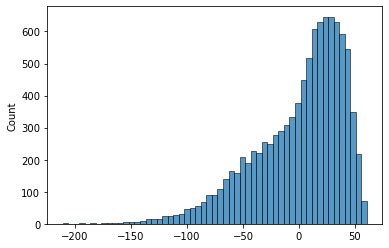

In [39]:
sns.histplot(difference)
plt.show()

In [40]:
obs_difference =  df3.groupby('user_verified').mean().at[False, 'favorite_count'] - df3.groupby('user_verified').mean().at[True, 'favorite_count']
obs_difference = abs(obs_difference)
print(obs_difference)

223.99357180429988


In [41]:
p = np.sum(np.array(difference) >= obs_difference) / len(difference)
p

0.0

Even removing all tweets with 0 favorites, the difference in number favorites per tweet between verified and not verified users is statistically significant, with a p value that is vanishingly small.

this presents a bit of a challenge for my analysis, since being verified or not is not always in the control of the account owners. While an organization has a better chance of getting verified than an individual, it's not a guarantee. I will have to consider whether or not to exclude tweets from verified accounts for my analysis.

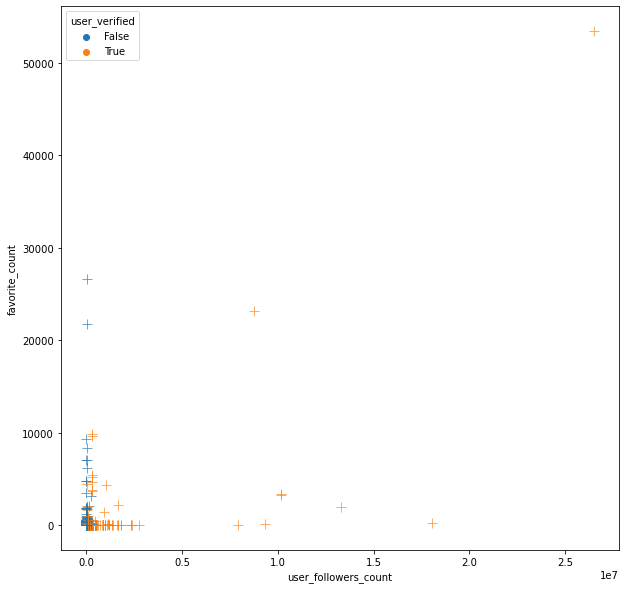

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
s = sns.scatterplot(data=df, x='user_followers_count', y='favorite_count', hue='user_verified',
                alpha=.8, marker='+', s=100
           )
plt.show()

while from this plot it looks like verified users tend to have more followers, it still looks like the majority of higher favorite count tweets come from accounts with relatively lower follower counts, whether or not they're verified.

In [43]:
x = np.array(df['user_followers_count'])
y = np.array(df['favorite_count'])

In [44]:
r = np.corrcoef(x.astype(int),y.astype(int))[0,1]
r_sq = r**2
r_sq

0.329818917785391

There is a weak correlation between user follower count and favorite count of a tweet they made. 

But it doesn't appear that verified users' tendency to have a higher follower count isn't what's responsible for the higher favorite counts. Likely, Twitter's algorithms which favor displaying tweets of verified users is what's responsible here. 